In [10]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
img = cv2.imread('/home/siddharth/Documents/BTP/Parcellation/Data/Segmented/test1.jpg')

In [6]:
img2 = plt.imread('/home/siddharth/Downloads/MaxMun_a_0051373_abide_cc.nii-slice000.jpg')

In [8]:
img2.shape

(512, 512, 3)

In [12]:
import numpy as np

In [13]:
img_n = img.copy()

In [14]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,  83, 148, 243, 250, 251, 252,
       253, 254, 255], dtype=uint8)

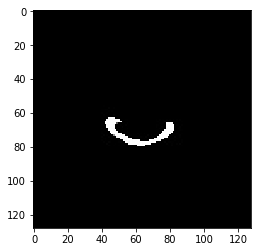

In [15]:
plt.imshow(img)

In [16]:
img.shape

(128, 128, 3)

In [17]:
ret, b_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

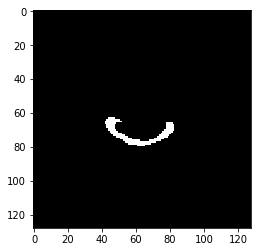

In [18]:
plt.imshow(b_img)
#plt.imshow(img)

In [31]:
# b_imgi = np.rot90(b_img) # 180 inversion for inverted image

In [19]:
horizontal_img = b_img.copy()
vertical_img = b_img.copy()
both_img = b_img.copy()

In [20]:
horizontal_img = cv2.flip( b_img, 0 )
vertical_img = cv2.flip( b_img, 1 )
both_img = cv2.flip( b_img, -1 )

In [21]:
b_imgi = horizontal_img

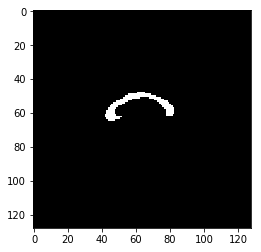

In [22]:
plt.imshow(b_imgi)

In [190]:

# psx = 0
# psy = 0
# for i in range(b_img.shape[0]):
#     for j in range(b_img.shape[1]):
#         if(b_img[j][i][0]!=0):
#             psx = i
#             psy = j
#             break
#     if(psx!=0):
#         break

In [23]:
# for one j value we r seeing different values of i, for which pixel intensity is 255. 
L = []
for j in range(b_imgi.shape[1]): 
    for i in range(b_imgi.shape[0]):
        if(b_imgi[i][j][0]==255):
            L.append((j,i))

In [24]:
L

[(42, 61),
 (42, 62),
 (43, 59),
 (43, 60),
 (43, 61),
 (43, 62),
 (43, 63),
 (44, 57),
 (44, 58),
 (44, 59),
 (44, 60),
 (44, 61),
 (44, 62),
 (44, 63),
 (44, 64),
 (45, 56),
 (45, 57),
 (45, 58),
 (45, 59),
 (45, 60),
 (45, 61),
 (45, 62),
 (45, 63),
 (45, 64),
 (46, 55),
 (46, 56),
 (46, 57),
 (46, 58),
 (46, 59),
 (46, 60),
 (46, 61),
 (46, 62),
 (46, 63),
 (46, 64),
 (47, 54),
 (47, 55),
 (47, 56),
 (47, 57),
 (47, 58),
 (47, 59),
 (47, 60),
 (47, 61),
 (47, 62),
 (47, 63),
 (47, 64),
 (48, 54),
 (48, 55),
 (48, 56),
 (48, 57),
 (48, 61),
 (48, 62),
 (48, 63),
 (49, 53),
 (49, 54),
 (49, 55),
 (49, 56),
 (49, 62),
 (49, 63),
 (50, 53),
 (50, 54),
 (50, 55),
 (50, 62),
 (50, 63),
 (51, 52),
 (51, 53),
 (51, 54),
 (51, 55),
 (51, 62),
 (52, 52),
 (52, 53),
 (52, 54),
 (53, 51),
 (53, 52),
 (53, 53),
 (53, 54),
 (54, 50),
 (54, 51),
 (54, 52),
 (54, 53),
 (55, 50),
 (55, 51),
 (55, 52),
 (55, 53),
 (56, 49),
 (56, 50),
 (56, 51),
 (56, 52),
 (57, 49),
 (57, 50),
 (57, 51),
 (57, 52),

In [18]:
L[0]

(42, 61)

In [19]:
L[-1]

(82, 60)

In [25]:
from matplotlib.lines import Line2D

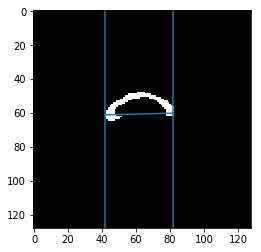

In [26]:
plt.axvline(L[0][0])
plt.axvline(L[-1][0])
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
plt.gca().add_line(line)
plt.imshow(b_imgi)

In [27]:
#Weitelson
psx = L[0][0]
pex = L[-1][0]
distance = L[-1][0] - L[0][0]
regions = []
regions.append(psx)
# regions.append(psx+int((1/3)*distance))
# regions.append(psx+int((1/2)*distance))
# regions.append(psx+int((2/3)*distance))
# regions.append(psx+int((4/5)*distance))
#Hofer
regions.append(psx+int((1/6)*distance))
regions.append(psx+int((1/2)*distance))
regions.append(psx+int((2/3)*distance))
regions.append(psx+int((3/4)*distance))
regions.append
regions.append(pex)

In [28]:
regions

[42, 48, 62, 68, 72, 82]

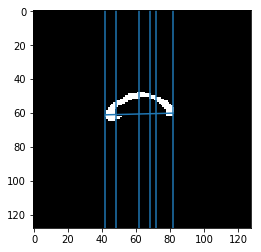

In [29]:
plt.axvline(regions[0])
plt.axvline(regions[1])
plt.axvline(regions[2])
plt.axvline(regions[3])
plt.axvline(regions[4])
plt.axvline(regions[5])
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
plt.gca().add_line(line)
plt.imshow(b_imgi)

In [ ]:
-----------------------------------------------------------------------------------------

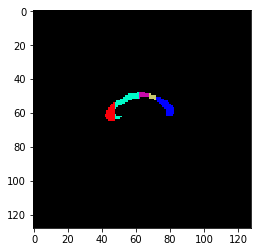

In [30]:
for i in range(b_imgi.shape[0]):
    for j in range(regions[0], regions[1]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 250)
            b_imgi.itemset((i, j, 1), 0)
            b_imgi.itemset((i, j, 2), 10)
    for j in range(regions[1], regions[2]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0),  0)
            b_imgi.itemset((i, j, 1),  250)
            b_imgi.itemset((i, j, 2),  200)
    for j in range(regions[2], regions[3]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0),  200)
            b_imgi.itemset((i, j, 1),  10)
            b_imgi.itemset((i, j, 2),  170)
    for j in range(regions[3], regions[4]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0),  200)
            b_imgi.itemset((i, j, 1),  200)
            b_imgi.itemset((i, j, 2),   110)
    for j in range(regions[4], regions[5]+1):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 0)
            b_imgi.itemset((i, j, 1), 0)
            b_imgi.itemset((i, j, 2), 255)
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
# plt.gca().add_line(line)
# plt.axhline(y=L[0][1])
# plt.axhline(y= b_imgi.shape[0])
# # plt.axhline(y=L[-1][1])
# plt.axvline(regions[0])
# plt.axvline(regions[2])
plt.imshow(b_imgi)

In [31]:
#anterior 
a = b_imgi[L[0][1]][L[0][0]][0]
b = b_imgi[L[0][1]][L[0][0]][1]
c = b_imgi[L[0][1]][L[0][0]][2]

#posterior
d = b_imgi[L[-1][1]][L[-1][0]][0]
e = b_imgi[L[-1][1]][L[-1][0]][1]
f = b_imgi[L[-1][1]][L[-1][0]][2]

In [ ]:
print(a)
plt.imsave()

In [ ]:
print(b)

In [ ]:
print(c)

In [25]:
print(b_imgi.shape[0])

128


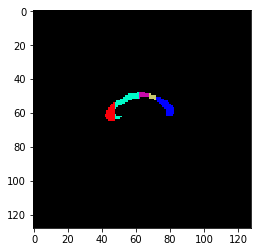

In [32]:
plt.imshow(b_imgi)

In [33]:
#parcellate using small assumption that the geometric baseline is a horizontal line for each
#assumption half i.e. on anterior and  as well as posterior.

#for upright image (original)
for j in range(regions[0],regions[3]):
    for i in range(L[0][1], b_imgi.shape[0]):
        if(b_imgi[i][j][1] != 0):
            b_imgi[i][j][0] = a 
            b_imgi[i][j][1] = b
            b_imgi[i][j][2] = c
            
for j in range(regions[2],regions[5]):
    for i in range(L[-1][1], b_imgi.shape[0]):
        if(b_imgi[i][j][1] != 0):
            b_imgi[i][j][0] = d 
            b_imgi[i][j][1] = e
            b_imgi[i][j][2] = f

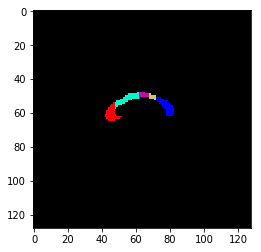

In [34]:
plt.imshow(b_imgi)

In [35]:
b_imgi.shape

(128, 128, 3)

In [36]:
np.unique(b_imgi)

array([  0,  10, 110, 170, 200, 250, 255], dtype=uint8)

In [37]:
def randomHueSaturationValue(image, hue_shift_limit=(-180, 180),
                             sat_shift_limit=(-255, 255),
                             val_shift_limit=(-255, 255), u=0.5):
    if np.random.random() < u:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image)
        hue_shift = np.random.randint(hue_shift_limit[0], hue_shift_limit[1]+1)
        hue_shift = np.uint8(hue_shift)
        h += hue_shift
        sat_shift = np.random.uniform(sat_shift_limit[0], sat_shift_limit[1])
        s = cv2.add(s, sat_shift)
        val_shift = np.random.uniform(val_shift_limit[0], val_shift_limit[1])
        v = cv2.add(v, val_shift)
        image = cv2.merge((h, s, v))
        #image = cv2.merge((s, v))
        image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

    return image

def randomShiftScaleRotate(image, mask,
                           shift_limit=(-0.0, 0.0),
                           scale_limit=(-0.0, 0.0),
                           rotate_limit=(-0.0, 0.0), 
                           aspect_limit=(-0.0, 0.0),
                           borderMode=cv2.BORDER_CONSTANT, u=0.5):
    if np.random.random() < u:
        height, width, channel = image.shape

        angle = np.random.uniform(rotate_limit[0], rotate_limit[1])
        scale = np.random.uniform(1 + scale_limit[0], 1 + scale_limit[1])
        aspect = np.random.uniform(1 + aspect_limit[0], 1 + aspect_limit[1])
        sx = scale * aspect / (aspect ** 0.5)
        sy = scale / (aspect ** 0.5)
        dx = round(np.random.uniform(shift_limit[0], shift_limit[1]) * width)
        dy = round(np.random.uniform(shift_limit[0], shift_limit[1]) * height)

        cc = np.math.cos(angle / 180 * np.math.pi) * sx
        ss = np.math.sin(angle / 180 * np.math.pi) * sy
        rotate_matrix = np.array([[cc, -ss], [ss, cc]])

        box0 = np.array([[0, 0], [width, 0], [width, height], [0, height], ])
        box1 = box0 - np.array([width / 2, height / 2])
        box1 = np.dot(box1, rotate_matrix.T) + np.array([width / 2 + dx, height / 2 + dy])

        box0 = box0.astype(np.float32)
        box1 = box1.astype(np.float32)
        mat = cv2.getPerspectiveTransform(box0, box1)
        image = cv2.warpPerspective(image, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                    borderValue=(
                                        0, 0,
                                        0,))
        mask = cv2.warpPerspective(mask, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                   borderValue=(
                                       0, 0,
                                       0,))

    return image, mask



def randomVerticleFlip(image, mask, u=0.5):
    if np.random.random() < u:
        image = cv2.flip(image, 0)
        mask = cv2.flip(mask, 0)

    return image, mask

def randomRotate90(image, mask, u=0.5):
    if np.random.random() < u:
        image=np.rot90(image)
        mask=np.rot90(mask)

    return image, mask

In [111]:
# mask = b_imgi.copy()
img = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/valid/image/Leuven_2_0050750_abide_msp.nii-slice000.jpg')

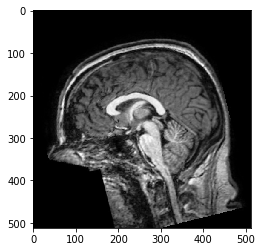

In [112]:
plt.imshow(img)

In [114]:
imgt = img.transpose(2,0,1)

In [117]:
imgt = torch.Tensor(imgt)

In [118]:
imgt.shape

torch.Size([3, 512, 512])

In [120]:
torchvision.utils.save_image(imgt, "test2.jpg", nrow=1, padding=0)

In [90]:
img = img/255

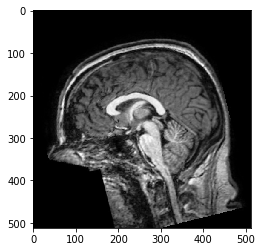

In [91]:
plt.imshow(img)

In [76]:
img = img * 255

In [78]:
img = img / 255.0 

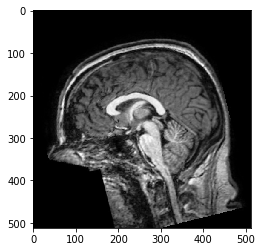

In [79]:
plt.imshow(img)

In [92]:
np.unique(img)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [102]:
img_t = torch.Tensor(img)

In [107]:
img_t = img_t.permute(2,0,1)

In [108]:
img_t.shape

torch.Size([3, 512, 512])

In [99]:
import torchvision

In [110]:
torchvision.utils.save_image(img_t, "test.jpg", nrow=1, padding=0)

In [77]:
import torch 

In [ ]:
img_t = torch.T

In [75]:
np.unique(img)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [41]:
#mask.shape
img.shape

(512, 512, 3)

In [42]:
np.unique(mask)

array([  0,  10, 110, 170, 200, 250, 255], dtype=uint8)

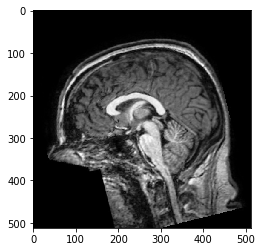

In [43]:
plt.imshow(img)

In [44]:
   img = randomHueSaturationValue(img,
                                   hue_shift_limit=(-30, 30),
                                   sat_shift_limit=(-5, 5),
                                   val_shift_limit=(-15, 15))

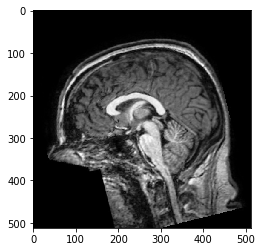

In [45]:
plt.imshow(img)

In [46]:
    img, mask = randomShiftScaleRotate(img, mask,
                                       shift_limit=(-0.1, 0.1),
                                       scale_limit=(-0.1, 0.1),
                                       aspect_limit=(-0.1, 0.1),
                                       rotate_limit=(-0, 0))

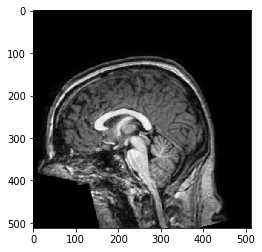

In [47]:
plt.imshow(img)

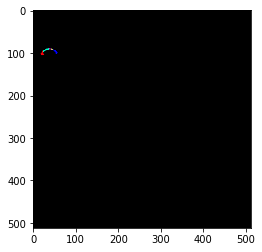

In [48]:
plt.imshow(mask)

In [49]:
np.unique(mask)

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  13,  14,
        15,  16,  19,  20,  21,  23,  24,  25,  26,  27,  29,  30,  31,
        32,  33,  40,  45,  46,  49,  53,  58,  63,  65,  66,  67,  68,
        69,  70,  71,  72,  74,  75,  77,  78,  79,  80,  81,  82,  83,
        85,  86,  87,  88,  89,  94,  96,  97,  99, 100, 102, 103, 105,
       106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 122,
       124, 125, 127, 128, 133, 139, 142, 143, 144, 148, 151, 153, 156,
       159, 160, 166, 167, 170, 171, 174, 175, 181, 184, 197, 200, 202,
       206, 207, 208, 209, 212, 213, 216, 219, 224, 228, 230, 231, 232,
       234, 236, 250, 255], dtype=uint8)

In [50]:
mask = b_imgi.copy()

In [51]:
np.unique(mask)

array([  0,  10, 110, 170, 200, 250, 255], dtype=uint8)

In [55]:
def randomHorizontalFlip(image, mask, u=0.5):
    if 0 < u:
        image = cv2.flip(image, 1)
        mask = cv2.flip(mask, 1)

    return image, mask

In [56]:
img, mask = randomHorizontalFlip(img, mask)

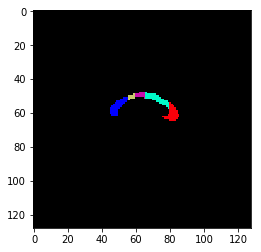

In [57]:
plt.imshow(mask)

In [59]:
np.unique(mask)

array([  0,  10, 110, 170, 200, 250, 255], dtype=uint8)

In [62]:
mask = np.rot90(mask)

In [63]:
np.unique(mask)

array([  0,  10, 110, 170, 200, 250, 255], dtype=uint8)

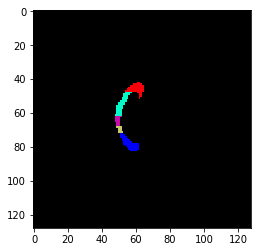

In [65]:
plt.imshow(mask)

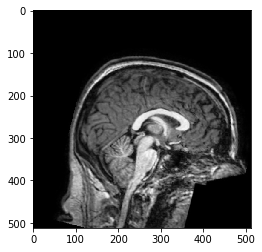

In [66]:
plt.imshow(img)

In [67]:
maxx = np.max(img)
minn = np.min(img) 

img = (img - maxx) / (maxx - minn)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [60]:
def randomRotate90(image, mask, u=0.5):
    if 0 < u:
        image=np.rot90(image)
        mask=np.rot90(mask)

In [61]:
img, mask = randomRotate90(img, mask)

TypeError: 'NoneType' object is not iterable

In [ ]:
 


    
    # img, mask = randomVerticleFlip(img, mask)
    

----------------------------------------------------------------------------------

In [204]:
#plt.imsave('t2.jpg',b_imgi)

In [73]:
#import scipy.misc as sm

In [76]:
#sm.imsave('outfile.jpg', b_imgi)

/home/siddharth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [78]:
#i6= sm.imread('outfile.jpg')

/home/siddharth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [79]:
#np.unique(i6)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  80,
        81,  83,  85,  87,  91,  93,  94,  95,  97,  98,  99, 100, 102,
       103, 110, 120, 122, 123, 131, 135, 138, 142, 151, 152, 154, 155,
       159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 173, 174,
       176, 177, 178, 179, 180, 181, 182, 184, 189, 190, 191, 195, 196,
       197, 199, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 214,
       215, 216, 217, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 25

In [69]:
#import matplotlib.image as im

In [70]:
#im.imsave('b.jpg',b_imgi)

In [57]:
#i4 = plt.imread('b.jpg')

In [59]:
#np.unique(i4)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  67,  68,
        69,  70,  71,  77,  81,  85,  87,  91,  92, 100, 102, 103, 105,
       106, 112, 114, 123, 133, 135, 140, 141, 144, 146, 147, 154, 172,
       174, 175, 181, 184, 185, 186, 187, 188, 191, 192, 193, 196, 197,
       198, 199, 200, 202, 203, 205, 206, 207, 209, 210, 212, 213, 214,
       215, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255],
      dtype=uint8)

In [47]:
#from PIL import Image

In [64]:
#im.save('try.jpg')

In [65]:
#im1 = Image.open('try.jpg')

In [66]:
#np.unique(im1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  80,
        81,  83,  85,  87,  91,  93,  94,  95,  97,  98,  99, 100, 102,
       103, 110, 120, 122, 123, 131, 135, 138, 142, 151, 152, 154, 155,
       159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 173, 174,
       176, 177, 178, 179, 180, 181, 182, 184, 189, 190, 191, 195, 196,
       197, 199, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 214,
       215, 216, 217, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 25

In [39]:
#plt.imsave('b_img.jpg',b_imgi)

In [40]:
#i2 = cv2.imread('b_img.jpg')

In [41]:
#np.unique(i2)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,
        90,  91,  94, 101, 106, 109, 116, 117, 121, 123, 124, 125, 126,
       127, 129, 132, 137, 147, 149, 155, 156, 159, 165, 169, 170, 172,
       174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 25

In [42]:
#i3 = plt.imread('b_img.jpg')

In [43]:
#np.unique(i3)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  67,  68,
        69,  70,  71,  77,  81,  85,  87,  91,  92, 100, 102, 103, 105,
       106, 112, 114, 123, 133, 135, 140, 141, 144, 146, 147, 154, 172,
       174, 175, 181, 184, 185, 186, 187, 188, 191, 192, 193, 196, 197,
       198, 199, 200, 202, 203, 205, 206, 207, 209, 210, 212, 213, 214,
       215, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255],
      dtype=uint8)

In [44]:
#i3.shape

(128, 128, 3)

In [46]:
#i2.shape

(128, 128, 3)

In [82]:
#b_imgi.shape

(128, 128, 3)

------------------------------------------------------------------------------------------

# Color Mapping 

for instance segmentation... updating targets as (batch_size,height,width) in which each pixel corresponds to class label it belongs to. 

In [38]:
np.save('b_im.npy',b_imgi)

In [39]:
i7 = np.load('b_im.npy')

In [40]:
i7.shape

(128, 128, 3)

In [41]:
np.unique(i7)

array([  0, 100, 120, 240, 250, 255], dtype=uint8)

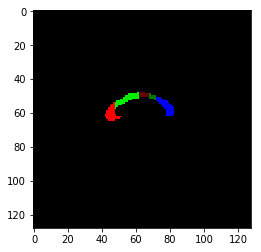

In [20]:
plt.imshow(i7)

In [44]:
imgc = i7.copy()

In [299]:
np.where(imgc==255)

(array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
        59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
        64, 64]),
 array([47, 46, 47, 45, 46, 47, 44, 45, 46, 47, 44, 45, 46, 47, 43, 44, 45,
        46, 47, 43, 44, 45, 46, 47, 42, 43, 44, 45, 46, 47, 48, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 43, 44, 45, 46, 47, 48, 49, 50, 44, 45,
        46, 47]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [300]:
a = np.where(imgc==255)

In [301]:
a

(array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
        59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
        64, 64]),
 array([47, 46, 47, 45, 46, 47, 44, 45, 46, 47, 44, 45, 46, 47, 43, 44, 45,
        46, 47, 43, 44, 45, 46, 47, 42, 43, 44, 45, 46, 47, 48, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 43, 44, 45, 46, 47, 48, 49, 50, 44, 45,
        46, 47]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [304]:
c = a[2][0]
c

0

In [312]:
a[1][0]

47

In [305]:
ind = np.zeros((128,128))

In [51]:
dic = {  
        0 : 0,
        80 : 1,
        170 : 2,
        210 : 3,
        330 : 4,
        255 : 5,
}

In [53]:
dic[255]

5

In [54]:
dic

{0: 0, 80: 1, 170: 2, 210: 3, 330: 4, 255: 5}

In [315]:
a[0].shape[0]

53

In [316]:
a[1].shape[0]

53

In [322]:
a[0]

array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
       59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
       62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
       64, 64])

In [40]:
# a = np.where[imgc==0]

In [53]:
# for i in dic:
#     a = np.where(imgc==i)
#     b = a[0].shape[0]
#     c = a[1].shape[0]
#     ch = a[2][0]
#     for j in range(b):
#         for k in range(c):
#             fir = a[0][j]
#             sec = a[1][k]
#             ind[fir][sec] = dic[i]

In [172]:
b_imgc = b_imgi.copy()

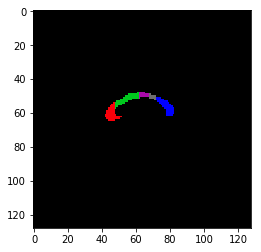

In [173]:
plt.imshow(b_imgc)

In [60]:
d = np.sum(b_imgc,2)

In [61]:
np.unique(d)

array([  0,  80, 170, 210, 255, 330], dtype=uint64)

In [62]:
d.shape

(128, 128)

In [63]:
e = d.copy()

In [64]:
np.unique(e)

array([  0,  80, 170, 210, 255, 330], dtype=uint64)

In [65]:
for i in dic:
    e[d==i] = dic[i] 

In [66]:
np.unique(e)

array([0, 1, 2, 3, 4, 5], dtype=uint64)

In [67]:
e.shape

(128, 128)

In [68]:
out = np.zeros((e.shape[0],e.shape[1],3))

In [69]:
out.shape

(128, 128, 3)

In [80]:
out[:,:]

(128, 128, 3)

In [82]:
np.sum(e==2)

51

In [85]:
out[e==2].shape

(51, 3)

In [78]:
dic_out = { 
    0 : (0,0,0),
    1 : (50,20,10),
    2:(0,100,70),
    3:(70,70,70),
    4:(110,110,110),
    5:(0,0,255)
}

In [77]:
dic.keys()

dict_keys([0, 80, 170, 210, 330, 255])

In [91]:
for j in dic_out:
    print(dic_out[j])

(0, 0, 0)
(50, 20, 10)
(0, 100, 70)
(70, 70, 70)
(110, 110, 110)
(0, 0, 255)


In [ ]:
out[e==]

In [86]:
for j in dic_out:
    out[e==j] = dic_out[j] 

In [87]:
np.unique(out)

array([  0.,  10.,  20.,  50.,  70., 100., 110., 255.])

In [88]:
out.shape

(128, 128, 3)

In [108]:
np.sum(e==1)

53

In [109]:
np.sum(e==2)

51

In [110]:
np.sum(e==4)

10

In [111]:
np.sum(e==5)

57

In [107]:
np.sum(e==3)

17

In [112]:
out[e==1].shape

(53, 3)

In [113]:
out[e==2].shape

(51, 3)

In [114]:
out[e==3].shape

(17, 3)

In [115]:
out[e==4].shape

(10, 3)

In [116]:
out[e==5].shape

(57, 3)

In [118]:
np.unique(out[e==0])

array([0.])

In [119]:
np.unique(out[e==1])

array([10., 20., 50.])

In [120]:
np.unique(out[e==3])

array([70.])

In [121]:
np.unique(out[e==4])

array([110.])

In [122]:
np.unique(out[e==5])

array([  0., 255.])

In [124]:
out[e==1]

array([[50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20., 10.],
       [50., 20.

In [125]:
out[e==2]

array([[  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
       [  0., 100.,  70.],
 

In [126]:
out[e==3]

array([[70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.],
       [70., 70., 70.]])

In [127]:
out[e==4]

array([[110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.],
       [110., 110., 110.]])

In [128]:
out[e==5]

array([[  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
 

In [130]:
np.unique(b_imgi)

array([  0,  10,  20,  50,  70, 100, 110, 255], dtype=uint8)

In [135]:
np.unique(out)

array([  0.,  10.,  20.,  50.,  70., 100., 110., 255.])

In [134]:
np.array_equal(out,b_imgi)

True

In [140]:
out = out.astype(b_imgi.dtype)

In [141]:
np.unique(out)

array([  0,  10,  20,  50,  70, 100, 110, 255], dtype=uint8)

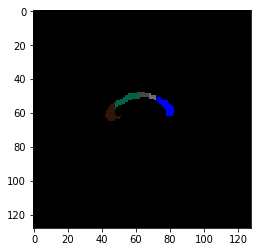

In [142]:
plt.imshow(b_imgi)

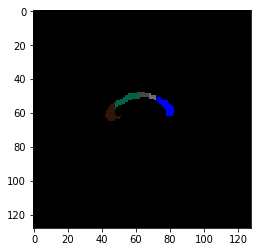

In [143]:
plt.imshow(out)

Finished it !

In [98]:
#from PIL import Image

In [99]:
#imgo = Image.fromarray(out, 'RGB')

In [102]:
# imgo.save('my.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


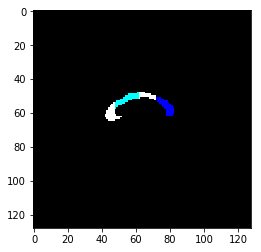

In [89]:
#plt.imshow(out)

In [57]:
#rand = np.zeros((1,imgc.shape[0], imgc.shape[1]))

In [58]:
##rand.shape

(1, 128, 128)

In [61]:
#rand[:][:] = imgc[:,:,0] + imgc[:,:,1] + imgc[:,:,2]

In [51]:
#imgc.shape

(128, 128, 3)

In [52]:
#rand.shape

(128, 128)

In [32]:
#np.unique(imgc)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
#rand.shape

In [54]:
#np.unique(rand)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [38]:
#np.where(rand==3)[1].shape[0]

17

In [39]:
#np.where(imgc==3)[2].shape[0]

17

In [62]:
    #color_map = {
        0: (0,0,0),
        1: (255,0,0), 
        2: (0,240,0),
        3: (100,0,0),
        4: (0,120,0),
        5: (0,0,250)              
        }

In [64]:
#color_map[1][0]
    

255

In [ ]:
=====----------------------------------==================---------------------

In [2]:
# import matplotlib.pyplot as plt
# import torch
# import numpy as np

In [35]:
# inp = np.load('b_im.npy')

In [36]:
# inp.shape

(128, 128, 3)

In [37]:
# np.unique(inp)

array([  0, 100, 120, 240, 250, 255], dtype=uint8)

In [38]:
# inp

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

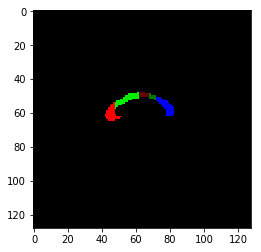

In [67]:
plt.imshow(inp)

In [68]:
mapping = {
            0: 0,
            255:1, 
            240:2,
            100:3,
            120:4,
            250:5              
        }

In [151]:
maskn = inp.copy()

In [152]:
np.where(maskn==255)

(array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
        59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
        64, 64]),
 array([47, 46, 47, 45, 46, 47, 44, 45, 46, 47, 44, 45, 46, 47, 43, 44, 45,
        46, 47, 43, 44, 45, 46, 47, 42, 43, 44, 45, 46, 47, 48, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 43, 44, 45, 46, 47, 48, 49, 50, 44, 45,
        46, 47]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [153]:
np.where(maskn==250)

(array([51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 54, 54, 54,
        54, 54, 54, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57,
        57, 57, 57, 57, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 60, 60, 60,
        60, 60, 61, 61, 61, 61]),
 array([72, 73, 74, 72, 73, 74, 75, 76, 73, 74, 75, 76, 77, 78, 74, 75, 76,
        77, 78, 79, 75, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 81, 77, 78,
        79, 80, 81, 82, 78, 79, 80, 81, 82, 78, 79, 80, 81, 82, 78, 79, 80,
        81, 82, 78, 79, 80, 81]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [72]:
label = np.zeros((maskn.shape[0],maskn.shape[1]))    
for k in mapping:
    maskn[maskn==k] = mapping[k]
label = maskn[:,:,0] + maskn[:,:,1] + maskn[:,:,2] 

In [73]:
label.shape

(128, 128)

In [74]:
np.unique(label)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [75]:
np.where(label==1)

(array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
        59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
        64, 64]),
 array([47, 46, 47, 45, 46, 47, 44, 45, 46, 47, 44, 45, 46, 47, 43, 44, 45,
        46, 47, 43, 44, 45, 46, 47, 42, 43, 44, 45, 46, 47, 48, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 43, 44, 45, 46, 47, 48, 49, 50, 44, 45,
        46, 47]))

In [149]:
np.where(label==5)

(array([51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 54, 54, 54,
        54, 54, 54, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57,
        57, 57, 57, 57, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 60, 60, 60,
        60, 60, 61, 61, 61, 61]),
 array([72, 73, 74, 72, 73, 74, 75, 76, 73, 74, 75, 76, 77, 78, 74, 75, 76,
        77, 78, 79, 75, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 81, 77, 78,
        79, 80, 81, 82, 78, 79, 80, 81, 82, 78, 79, 80, 81, 82, 78, 79, 80,
        81, 82, 78, 79, 80, 81]))

In [77]:
ze = torch.zeros((128,128))

In [109]:
label_exd = np.stack((label,ze,ze,ze,ze,ze),axis=0) 

In [110]:
label_exd.shape

(6, 128, 128)

In [156]:
np.equal(label_exd[0],label)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [111]:
np.where(label_exd==1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59,
        59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64,
        64, 64]),
 array([47, 46, 47, 45, 46, 47, 44, 45, 46, 47, 44, 45, 46, 47, 43, 44, 45,
        46, 47, 43, 44, 45, 46, 47, 42, 43, 44, 45, 46, 47, 48, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 43, 44, 45, 46, 47, 48, 49, 50, 44, 45,
        46, 47]))

In [115]:
np.where(label_exd==2)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]),
 array([48, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53,
        53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 57]),
 array([61, 56, 57, 58, 59, 60, 61, 54, 55, 56, 57, 58, 59, 60, 61, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 51, 52, 53, 54, 55, 56, 57, 49, 50, 51,
        52, 53, 54, 55, 48, 49, 50, 51, 52, 53, 48, 49, 50, 51, 48, 49, 48]))

In [112]:
label_exdt = torch.from_numpy(label_exd)

In [113]:
label_exdt.shape

torch.Size([6, 128, 128])

In [114]:
label_exdt.unique()

tensor([0., 1., 2., 3., 4., 5.])

In [116]:
val,ind = torch.max(label_exdt,0)

In [117]:
val

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [120]:
torch.sum(val==1)

tensor(53)

In [122]:
np.sum(label==1)

53

In [121]:
torch.sum(val==2)

tensor(51)

In [123]:
np.sum(label==2)

51

In [148]:
torch.sum(ind == 5)

tensor(16196)

In [129]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [124]:
labelt = torch.from_numpy(label)

In [130]:
labelt

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [125]:
labelt.shape

torch.Size([128, 128])

In [132]:
labelt = labelt.float()

In [133]:
labelt

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [126]:
val.shape

torch.Size([128, 128])

In [134]:
torch.equal(val,labelt)

True

In [137]:
val.unique()

tensor([0., 1., 2., 3., 4., 5.])

In [136]:
ind.unique()

tensor([0, 5])

In [138]:
def viz_image(pred):

    (h,w) = (pred.shape[1],pred.shape[2])

    color = np.zeros((h, w,3)) 

    val,ind = torch.max(pred,0)

    for i in range(h):      
        for j in range(w):
                k = val[i][j]
                k = k.item()
                #print(k) 
                #print(dic[k][0])
                color[i][j][0] = dic[k][0]
                color[i][j][1] = dic[k][1]
                color[i][j][2] = dic[k][2]

    return color

In [139]:
dic = {
    0: (0,0,0),
    1: (255,0,0), 
    2: (0,240,0),
    3: (100,0,0),
    4: (0,120,0),
    5: (0,0,250)              
    }

In [ ]:
dic[1][]

In [140]:
out = viz_image(label_exdt)

In [141]:
out.shape

(128, 128, 3)

In [142]:
np.unique(out)

array([  0., 100., 120., 240., 250., 255.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


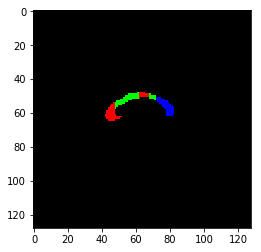

In [143]:
plt.imshow(out)

In [159]:
rand = torch.rand(6,2,2)

In [160]:
rand 

tensor([[[0.2060, 0.2204],
         [0.6087, 0.4909]],

        [[0.6609, 0.5783],
         [0.7664, 0.5404]],

        [[0.8585, 0.2954],
         [0.5022, 0.5436]],

        [[0.5467, 0.0258],
         [0.3014, 0.0925]],

        [[0.1628, 0.9365],
         [0.7002, 0.5262]],

        [[0.5431, 0.8571],
         [0.3813, 0.6907]]])

In [163]:
v,i = torch.max(rand,0)

In [165]:
i

tensor([[2, 4],
        [1, 5]])

In [167]:
v

tensor([[0.8585, 0.9365],
        [0.7664, 0.6907]])

In [168]:
torch.argmax(rand,0)

tensor([[2, 4],
        [1, 5]])

In [169]:
rand.numpy()

array([[[0.20602417, 0.22038352],
        [0.6087079 , 0.49090302]],

       [[0.66085654, 0.5782619 ],
        [0.7664419 , 0.5404362 ]],

       [[0.8585148 , 0.29542238],
        [0.50216305, 0.5435703 ]],

       [[0.54672354, 0.02580214],
        [0.3013984 , 0.09247446]],

       [[0.16277945, 0.9364619 ],
        [0.70015764, 0.52617764]],

       [[0.54306734, 0.8570625 ],
        [0.38127363, 0.6907085 ]]], dtype=float32)

In [170]:
pred = np.load('pred.npy')

In [171]:
pred.shape

(6, 512, 512)

In [172]:
np.unique(pred)

array([-14.377333, -14.291693, -14.103696, ...,  17.96733 ,  18.070578,
        18.136751], dtype=float32)

In [176]:
predr=  pred.reshape(512,512,6)

In [175]:
pred.shape

(6, 512, 512)

In [177]:
predr.shape 

(512, 512, 6)

In [178]:
pred.shape

(6, 512, 512)

In [179]:
predt= torch.from_numpy(pred)

In [180]:
predt.shape

torch.Size([6, 512, 512])

In [181]:
predt.unique()

tensor([-14.3773, -14.2917, -14.1037,  ...,  17.9673,  18.0706,  18.1368])

In [189]:
i = torch.argmax(predt,0)

In [1]:
import matplotlib.pyplot as plt

In [4]:
i = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/Valid/mask/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

In [5]:
i.shape

(512, 512, 3)

In [192]:
m, ind = torch.max(predt,0)

In [194]:
ind.unique()

tensor([0])

In [195]:
torch.equal(ind,i)

True

In [246]:
p = np.load('pred5.npy')

In [247]:
p.shape

(6, 512, 512)

In [198]:
pt = torch.from_numpy(p)

In [208]:
inde = torch.argmax(pt,0)

In [209]:
inde.unique()

tensor([0])

In [210]:
pt.shape

torch.Size([6, 512, 512])

In [211]:
pt[0]

tensor([[ 2.9893,  4.6592,  4.7756,  ...,  5.3628,  4.0289,  1.6628],
        [ 5.5042,  8.4064,  9.4766,  ..., 10.2877,  8.3314,  3.9789],
        [ 7.2139, 11.4990, 12.2383,  ..., 13.6442, 10.6091,  5.1588],
        ...,
        [ 6.2544,  9.5957, 10.8133,  ..., 12.1051,  9.5154,  4.6347],
        [ 5.3466,  8.4639,  9.0700,  ..., 10.9106,  8.3136,  4.0359],
        [ 3.3220,  5.2648,  5.9189,  ...,  7.0447,  5.7083,  2.9625]])

In [212]:
pt[1]

tensor([[-1.3985, -3.5168, -4.4752,  ..., -5.2180, -4.7906, -3.2846],
        [-2.1299, -5.5119, -6.9608,  ..., -8.2423, -7.3540, -5.4624],
        [-2.6582, -6.3817, -8.6888,  ..., -9.5915, -9.0358, -6.6622],
        ...,
        [-2.1314, -5.4309, -7.1690,  ..., -8.8083, -7.7821, -5.5568],
        [-1.7478, -4.1962, -5.8569,  ..., -7.1021, -6.5595, -4.7234],
        [-0.8358, -2.2743, -3.1405,  ..., -3.8923, -3.6169, -2.6948]])

In [213]:
pt[2]

tensor([[ -2.1360,  -4.0291,  -5.2094,  ...,  -5.5213,  -5.0763,  -3.1813],
        [ -4.0959,  -7.2132,  -8.8950,  ...,  -9.6197,  -8.2947,  -5.0897],
        [ -4.7797,  -8.3731, -10.2152,  ..., -10.4889,  -9.2363,  -5.2796],
        ...,
        [ -4.2015,  -7.1096,  -8.4661,  ...,  -9.5052,  -7.8712,  -4.4108],
        [ -3.4717,  -5.7749,  -6.8674,  ...,  -7.6776,  -6.4375,  -3.3872],
        [ -2.0289,  -3.0683,  -3.4858,  ...,  -3.8744,  -3.0820,  -1.4396]])

In [214]:
pt[3]

tensor([[ -1.8892,  -3.7569,  -4.6659,  ...,  -5.1516,  -4.5961,  -2.8968],
        [ -4.0271,  -7.2392,  -9.0059,  ...,  -9.7868,  -8.7121,  -5.6212],
        [ -4.9785,  -9.4561, -11.2118,  ..., -12.5609, -10.6173,  -6.9547],
        ...,
        [ -4.5334,  -8.1451,  -9.7850,  ..., -11.1603,  -9.4756,  -5.8315],
        [ -3.8745,  -6.9186,  -8.0924,  ...,  -9.8321,  -7.9517,  -5.0898],
        [ -2.4148,  -4.2997,  -5.0681,  ...,  -6.0877,  -5.1875,  -3.2100]])

In [215]:
pt[4]

tensor([[ -4.4413,  -6.8050,  -7.9015,  ...,  -8.5799,  -7.0139,  -3.8043],
        [ -6.9398, -11.2581, -12.7619,  ..., -14.0872, -11.5428,  -6.6135],
        [ -7.2567, -11.9519, -13.8474,  ..., -14.8916, -12.5442,  -7.0306],
        ...,
        [ -6.3827, -10.4535, -11.8014,  ..., -13.9474, -11.0710,  -6.1320],
        [ -4.6850,  -7.6645,  -8.8806,  ..., -10.5755,  -8.6162,  -4.7358],
        [ -2.2297,  -3.9243,  -4.5032,  ...,  -5.6938,  -4.5241,  -2.7193]])

In [216]:
pt[5]

tensor([[-2.4884, -3.8343, -4.1884,  ..., -4.4791, -3.5288, -1.5847],
        [-4.2421, -6.6509, -6.9050,  ..., -7.7263, -5.6796, -2.6834],
        [-5.4328, -8.1027, -8.4920,  ..., -9.1793, -7.1652, -3.1243],
        ...,
        [-4.6186, -6.7640, -7.1820,  ..., -8.2191, -5.9999, -2.7612],
        [-3.9197, -5.4711, -5.9201,  ..., -6.8198, -5.1946, -2.1550],
        [-2.0360, -2.9910, -3.1724,  ..., -3.8388, -2.8717, -1.2847]])

In [218]:
index = torch.argmax(abs(pt),0)

In [219]:
index.unique()

tensor([0, 1, 3, 4])

In [230]:
torch.sum(index==0)

tensor(1908)

In [232]:
torch.sum(index==1)

tensor(1)

In [234]:
torch.sum(index==3)

tensor(135)

In [233]:
torch.sum(index==2)

tensor(0)

In [235]:
torch.sum(index==4)

tensor(260100)

In [236]:
torch.sum(index==5)

tensor(0)

In [222]:
def viz_image(pred):

    (h,w) = (pred.shape[1],pred.shape[2])

    #color = np.zeros((h, w,3))

    color = torch.zeros(3,h,w)

    ind = torch.argmax(abs(pred),0)

    for i in range(h):   
        for j in range(w):
                k = ind[i][j]
                k = k.item()
                #print(k) 
                #print(dic[k][0])
                color[0][i][j] = dic[k][0]
                color[1][i][j] = dic[k][1]
                color[2][i][j] = dic[k][2]

    return color

In [223]:
img  = viz_image(pt)

In [224]:
img.shape

torch.Size([3, 512, 512])

In [226]:
import torchvision

In [227]:
torchvision.utils.save_image(img, "exp.jpg", nrow=1, padding=0)

In [228]:
exp = plt.imread('exp.jpg')

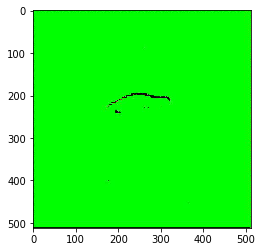

In [229]:
plt.imshow(exp)

In [237]:
a = plt.imread('pred5.jpg')

In [238]:
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [239]:
np.unique(a)

array([0], dtype=uint8)

In [256]:
ex = np.load('pred5.npy')

In [257]:
np.unique(ex)

array([-26.460636, -26.020418, -25.749722, ...,  22.91232 ,  23.07344 ,
        23.169985], dtype=float32)

In [258]:
ex.shape

(6, 512, 512)

In [259]:
ex[0]

array([[ 2.9893308,  4.659197 ,  4.7756433, ...,  5.362777 ,  4.0288625,
         1.6627914],
       [ 5.5042357,  8.406449 ,  9.476624 , ..., 10.287654 ,  8.331415 ,
         3.978936 ],
       [ 7.2139435, 11.498988 , 12.238276 , ..., 13.644223 , 10.609084 ,
         5.158836 ],
       ...,
       [ 6.2543764,  9.595691 , 10.813312 , ..., 12.105082 ,  9.51539  ,
         4.6346517],
       [ 5.346624 ,  8.463949 ,  9.069978 , ..., 10.910618 ,  8.313577 ,
         4.035865 ],
       [ 3.321993 ,  5.2648087,  5.918892 , ...,  7.044729 ,  5.7083144,
         2.9624932]], dtype=float32)

In [264]:
ex[1]

array([[-1.3984636, -3.5167708, -4.4752145, ..., -5.2180195, -4.790603 ,
        -3.2845695],
       [-2.1299205, -5.5119348, -6.9608026, ..., -8.242256 , -7.3539863,
        -5.4623556],
       [-2.6582084, -6.3816695, -8.688824 , ..., -9.591485 , -9.035795 ,
        -6.662199 ],
       ...,
       [-2.131375 , -5.4309177, -7.1690187, ..., -8.808276 , -7.782137 ,
        -5.556849 ],
       [-1.7478442, -4.1961527, -5.856932 , ..., -7.102144 , -6.5595074,
        -4.723382 ],
       [-0.8357737, -2.2742577, -3.1404603, ..., -3.8923419, -3.6169138,
        -2.694846 ]], dtype=float32)

In [265]:
ex[2]

array([[ -2.1359627,  -4.029136 ,  -5.2093806, ...,  -5.521284 ,
         -5.0763154,  -3.181292 ],
       [ -4.0958867,  -7.2132053,  -8.894961 , ...,  -9.619715 ,
         -8.294689 ,  -5.089725 ],
       [ -4.7796702,  -8.373083 , -10.215233 , ..., -10.488866 ,
         -9.2363205,  -5.2795696],
       ...,
       [ -4.2015157,  -7.109621 ,  -8.466131 , ...,  -9.505231 ,
         -7.8712   ,  -4.4108214],
       [ -3.47171  ,  -5.7748833,  -6.86741  , ...,  -7.6775846,
         -6.4375176,  -3.3872313],
       [ -2.0288727,  -3.068256 ,  -3.4857607, ...,  -3.874389 ,
         -3.0819955,  -1.4395726]], dtype=float32)

In [266]:
ex[3]

array([[ -1.8892417,  -3.7568662,  -4.665899 , ...,  -5.151606 ,
         -4.5960536,  -2.8967857],
       [ -4.027089 ,  -7.2391834,  -9.00586  , ...,  -9.786843 ,
         -8.712123 ,  -5.6211786],
       [ -4.978505 ,  -9.456092 , -11.211803 , ..., -12.560894 ,
        -10.617268 ,  -6.954695 ],
       ...,
       [ -4.533411 ,  -8.145086 ,  -9.785032 , ..., -11.160329 ,
         -9.475573 ,  -5.8315015],
       [ -3.8745174,  -6.918557 ,  -8.092392 , ...,  -9.832082 ,
         -7.9516745,  -5.0898056],
       [ -2.414754 ,  -4.2997484,  -5.0681424, ...,  -6.087733 ,
         -5.187464 ,  -3.2100186]], dtype=float32)

In [267]:
im = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/train/image/Caltech_0051456_abide_msp.nii-slice000.jpg')

In [268]:
im

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [269]:
im.shape

(512, 512, 3)

In [270]:
im.dtype

dtype('uint8')

In [296]:
pred = plt.imread('pred2.jpg')

In [298]:
pred.shape

(512, 512, 3)

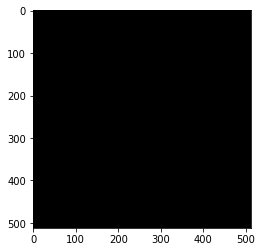

In [299]:
plt.imshow(pred)

In [300]:
m = np.mean(pred)

In [301]:
m 

0.0

In [302]:
np.unique(pred)

array([0], dtype=uint8)

In [305]:
predn = np.load('pred2.npy')

In [ ]:
pred

In [306]:
np.unique(predn)

array([-15.849206, -15.825301, -15.715868, ...,  12.035126,  12.078237,
        12.117629], dtype=float32)

In [307]:
predn.shape

(6, 512, 512)

In [308]:
predn[0]

array([[ 2.301077 ,  3.4670758,  3.901484 , ...,  3.324773 ,  2.5607285,
         1.191736 ],
       [ 4.241466 ,  6.8227997,  8.006368 , ...,  6.82046  ,  5.3496194,
         2.913797 ],
       [ 5.1151495,  8.530358 , 10.187628 , ...,  8.789077 ,  6.968244 ,
         3.860416 ],
       ...,
       [ 4.7965474,  8.175254 ,  9.824778 , ...,  9.005034 ,  7.3366218,
         4.2830358],
       [ 4.0550647,  7.073668 ,  8.680625 , ...,  7.784307 ,  6.387656 ,
         3.8027544],
       [ 2.451157 ,  4.655163 ,  5.6111517, ...,  5.214531 ,  4.094716 ,
         2.5482752]], dtype=float32)

In [311]:
np.unique(predn[1])

array([-7.055094  , -6.8603115 , -6.859318  , ..., -0.07654878,
       -0.0748288 , -0.07162526], dtype=float32)

In [312]:
predn[2]

array([[-0.6028869, -2.0800762, -3.0868518, ..., -2.8934734, -2.7174125,
        -1.9114424],
       [-1.349426 , -3.8926704, -5.6297717, ..., -5.2067084, -4.746037 ,
        -3.207573 ],
       [-1.9158599, -5.0996037, -6.951892 , ..., -6.397112 , -5.844772 ,
        -4.020639 ],
       ...,
       [-1.9300025, -4.79739  , -6.734269 , ..., -6.5784783, -6.0550036,
        -4.0957828],
       [-1.7023554, -4.268858 , -5.822667 , ..., -5.5327616, -4.9392056,
        -3.2613409],
       [-1.2610472, -2.8165543, -3.633915 , ..., -3.4072464, -2.8393297,
        -1.7530148]], dtype=float32)

In [282]:
maxx = np.max(image)
minn = np.min(image)

In [283]:
img2 = (image - maxx ) / (maxx - minn)

In [284]:
np.unique(img2)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [285]:
img2.shape 

(512, 512, 3)

In [286]:
img3 = img2.transpose(2,0,1)

In [287]:
img3.shape

(3, 512, 512)

In [289]:
img2.dtype

dtype('float64')

In [290]:
mask = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/valid/mask/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

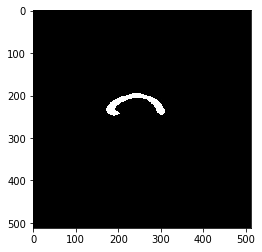

In [291]:
plt.imshow(mask)

In [292]:
mask.dtype

dtype('uint8')

In [313]:
test = plt.imread('/home/siddharth/Downloads/flip_both_Caltech_0051456_abide_msp.nii-slice000.jpg')

In [314]:
test.shape

(512, 512)

In [315]:
test2 = plt.imread('/home/siddharth/Downloads/flip_both_Caltech_0051456_abide_cc.nii-slice000.jpg')

In [316]:
test2.shape

(512, 512)

In [317]:
test3 = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/train/image/Caltech_0051456_abide_msp.nii-slice000.jpg')

In [318]:
test3.shape

(512, 512, 3)

In [319]:
test4 = plt.imread('/home/siddharth/Documents/BTP/ce_net/Corpus-Callosum-Instance-Segmentation/dataset/train/mask/Caltech_0051456_abide_cc.nii-slice000.jpg')

In [320]:
test4.shape

(512, 512, 3)

In [321]:
test5 = plt.imread('/home/siddharth/Downloads/flip_both_Caltech_0051457_abide_msp.nii-slice000.jpg')

In [322]:
test5.shape

(512, 512)

In [352]:
test6 = plt.imread('/home/siddharth/Documents/BTP/train_masks/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

In [353]:
test6.shape

(512, 512)

In [354]:
np.unique(test6)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  36, 219, 221, 223, 226, 227, 228, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255],
      dtype=uint8)

In [344]:
test7 = plt.imread('/home/siddharth/Documents/BTP/train_masks/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

In [345]:
test7.shape

(512, 512)

In [346]:
np.unique(test7)

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

In [348]:
import cv2

In [349]:
test8 = cv2.imread('/home/siddharth/Documents/BTP/train_masks/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

In [350]:
test8.shape

(512, 512, 3)

In [351]:
np.unique(test8)

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

In [356]:
np.unique(test6)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  36, 219, 221, 223, 226, 227, 228, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255],
      dtype=uint8)

In [357]:
sav = np.load('/home/siddharth/Documents/BTP/train_masks/Leuven_2_0050750_abide_cc.nii-slice000.jpg.npy')

In [358]:
sav.shape

(512, 512)

In [359]:
np.unique(sav)

array([  0, 255], dtype=uint8)

In [370]:
test9 = plt.imread('/home/siddharth/Downloads/Leuven_2_0050750_abide_cc.nii-slice000.jpg')

In [371]:
test9.shape

(512, 512)

In [365]:
np.unique(test9)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29, 220, 223, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)